Training data loaded successfully.
Shape of training data: (125973, 43)
Test data loaded successfully.
Shape of test data: (22544, 43)

--- Initial Data Overview (Training Data) ---
   duration protocol_type   service flag  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  num_root  num_file_creations  num_shells  num_access_files  num_outbound_cmds  is_host_login  is_guest_login  count  srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate    class
0         0           tcp  ftp_data   SF        491          0     0               0       0    0                  0          0                0           0      

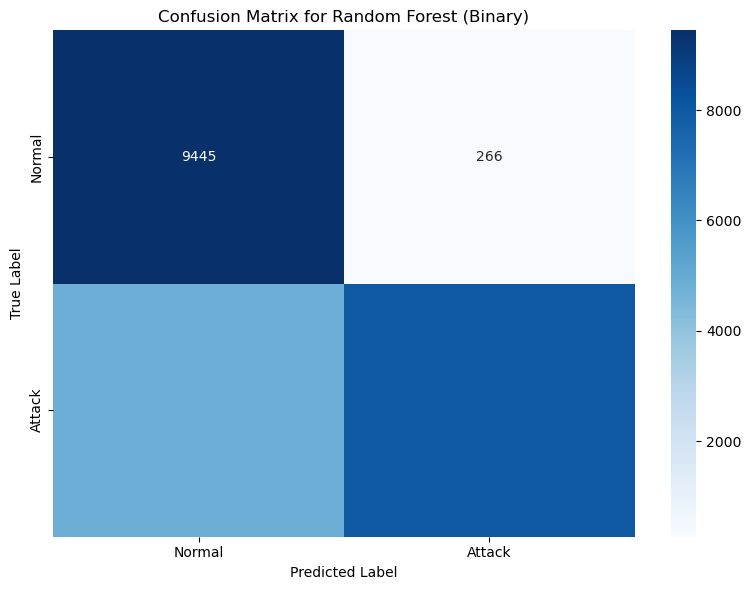


--- Training and Evaluating: Decision Tree (Binary) ---

Decision Tree (Binary) Key Performance Indicators (Weighted Averages):
  Accuracy: 0.7902
  Precision: 0.8220
  Recall: 0.7902
  F1-Score: 0.7901

Detailed Classification Report (per class):
              precision    recall  f1-score   support

      Normal       0.69      0.92      0.79      9711
      Attack       0.92      0.69      0.79     12833

    accuracy                           0.79     22544
   macro avg       0.81      0.81      0.79     22544
weighted avg       0.82      0.79      0.79     22544



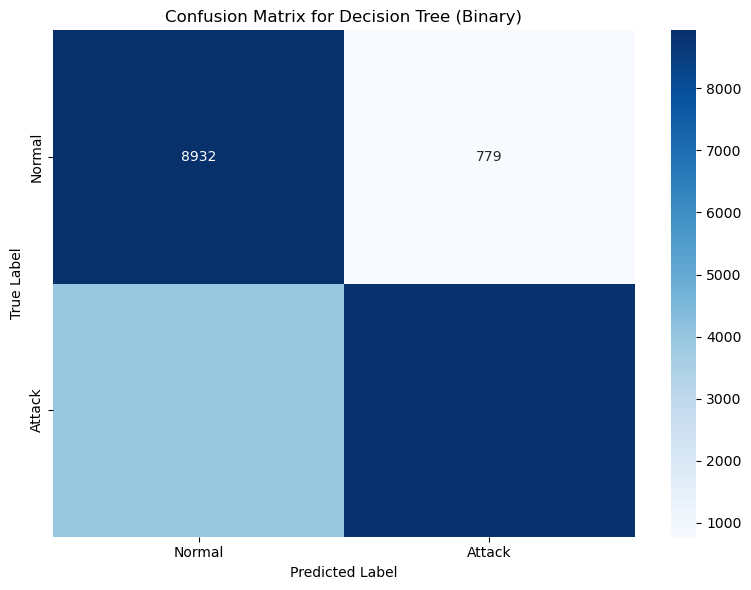


--- Starting Multi-Class Classification Evaluation (Normal vs. Attack Types) ---

--- Training and Evaluating: Random Forest (Multi-class) ---

Random Forest (Multi-class) Key Performance Indicators (Weighted Averages):
  Accuracy: 0.7196
  Precision: 0.5722
  Recall: 0.7196
  F1-Score: 0.6182

Detailed Classification Report (per class):
                 precision    recall  f1-score   support

        apache2       0.00      0.00      0.00       737
           back       0.44      0.96      0.60       359
buffer_overflow       0.00      0.00      0.00        20
      ftp_write       0.00      0.00      0.00         3
   guess_passwd       0.00      0.00      0.00      1231
     httptunnel       0.00      0.00      0.00       133
           imap       0.00      0.00      0.00         1
        ipsweep       0.99      0.97      0.98       141
           land       1.00      0.43      0.60         7
     loadmodule       0.00      0.00      0.00         2
       mailbomb       0.00     

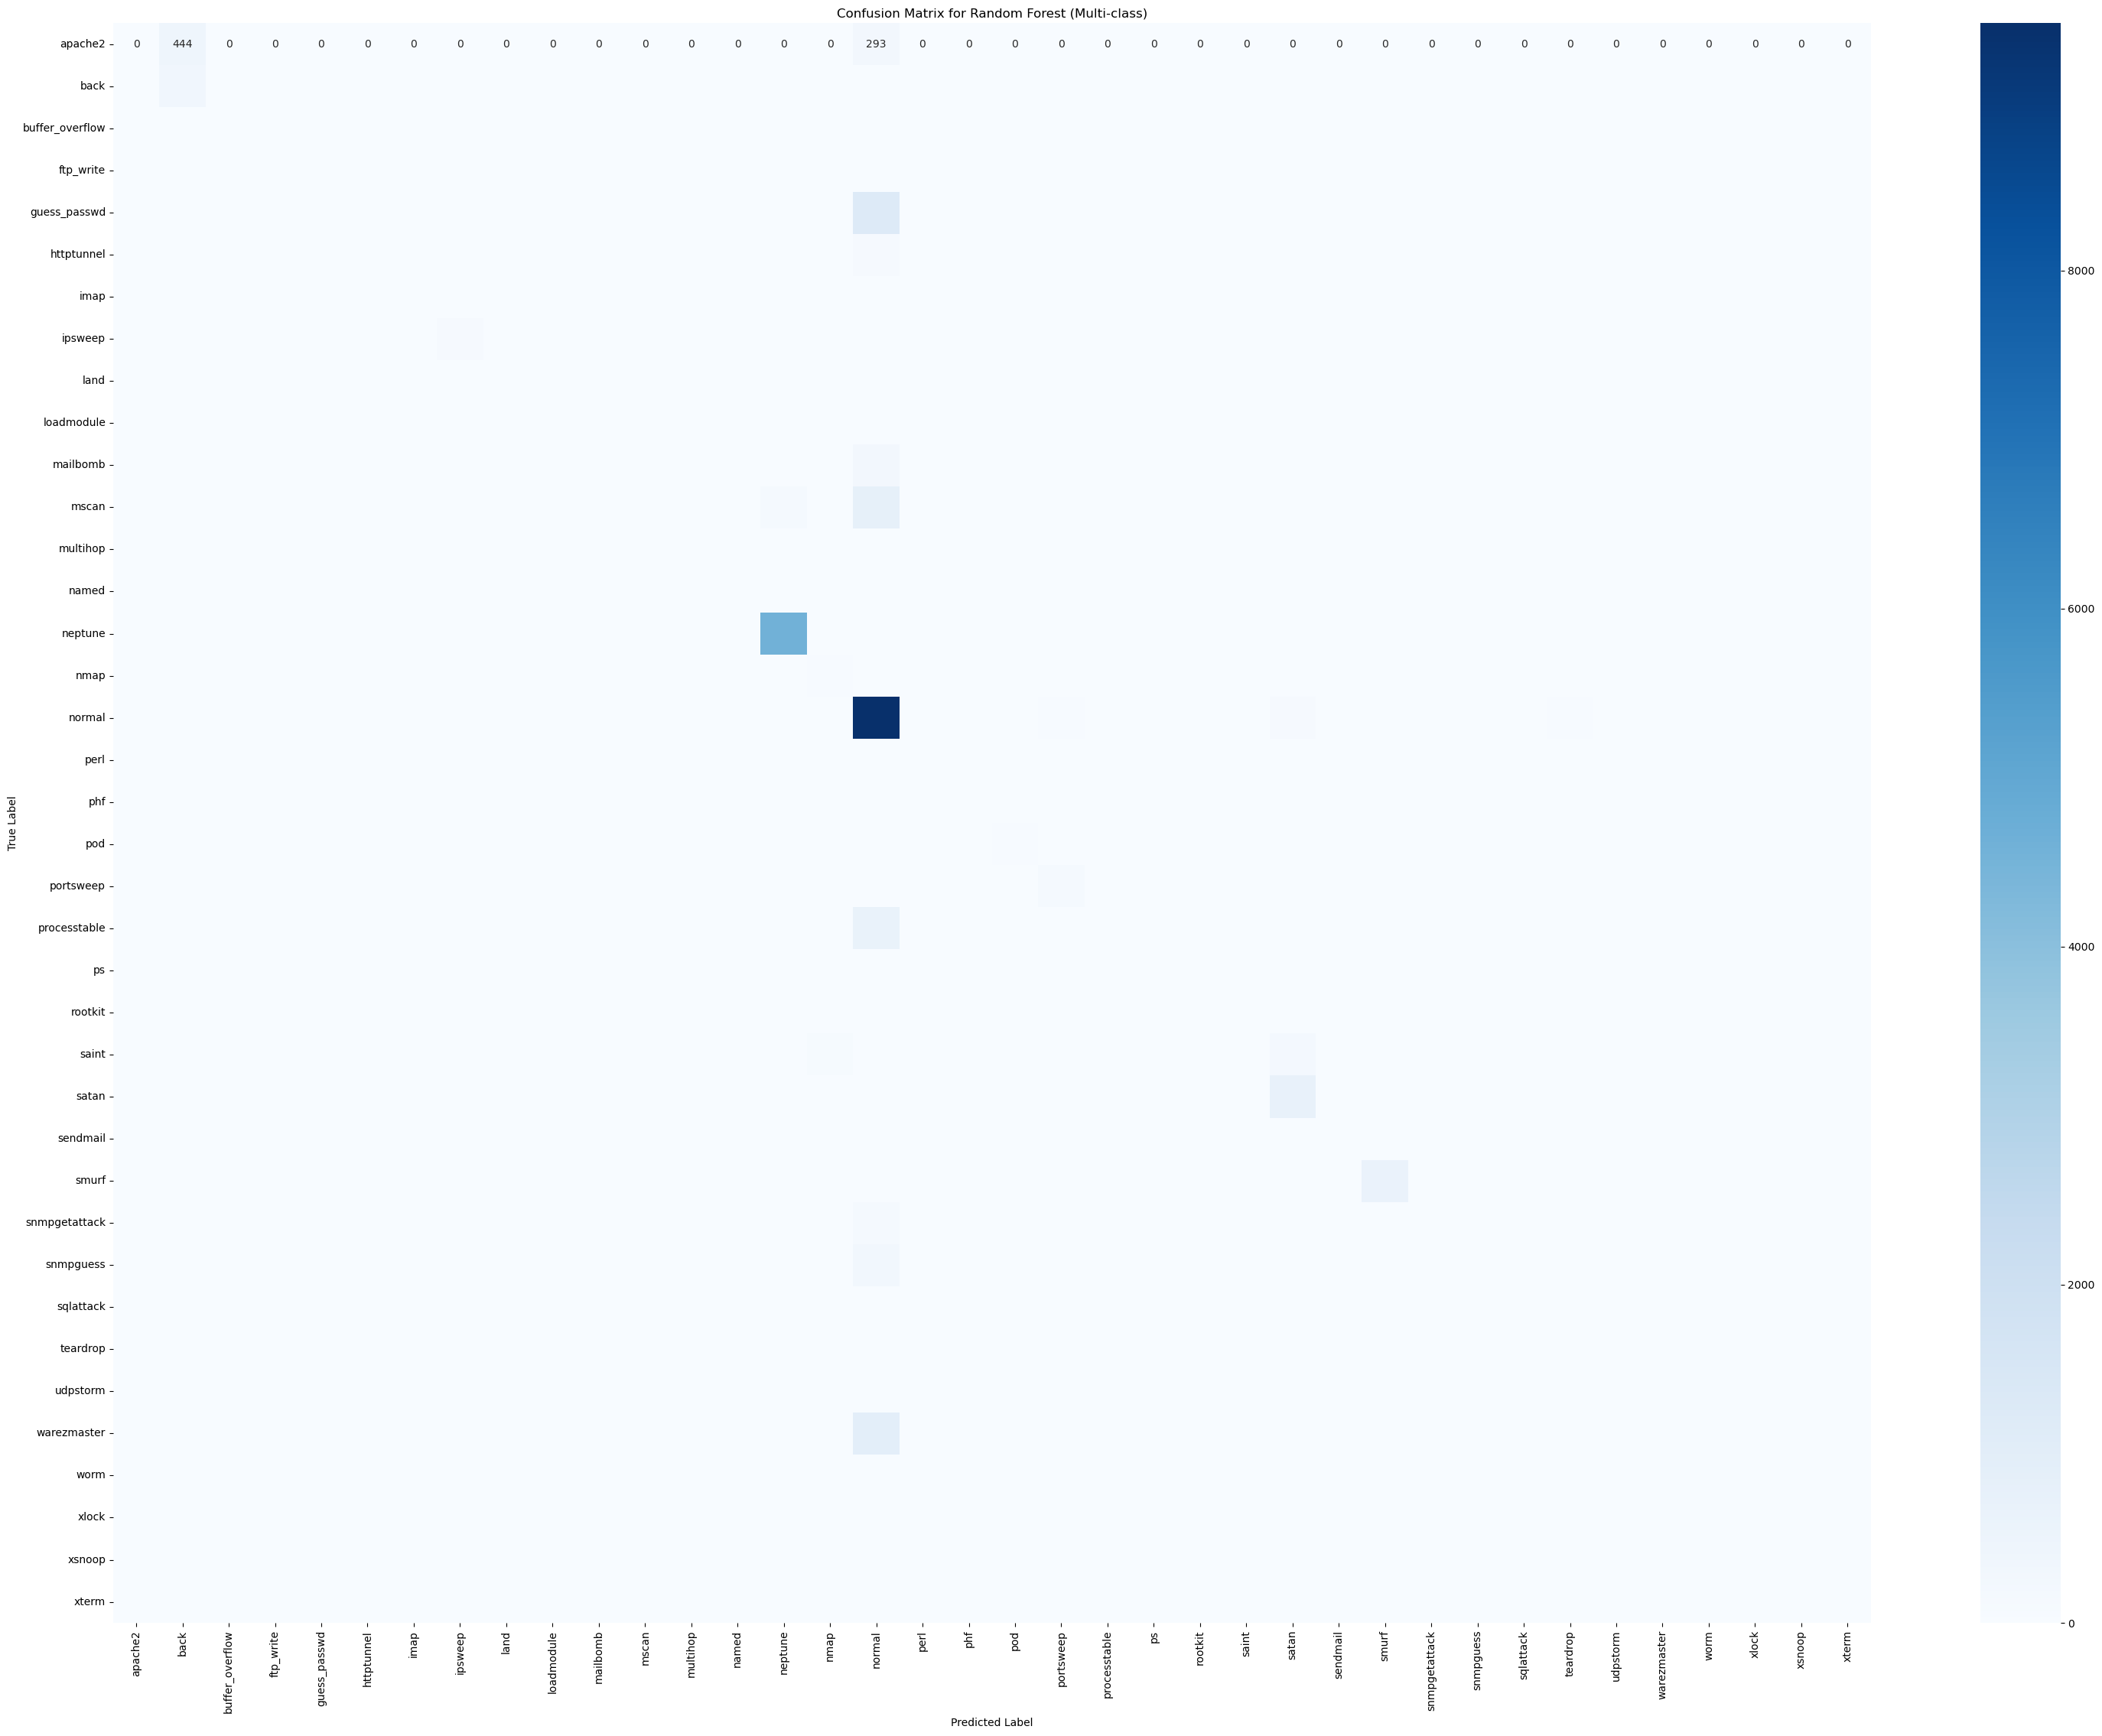


--- Training and Evaluating: Decision Tree (Multi-class) ---

Decision Tree (Multi-class) Key Performance Indicators (Weighted Averages):
  Accuracy: 0.6898
  Precision: 0.6448
  Recall: 0.6898
  F1-Score: 0.6105

Detailed Classification Report (per class):
                 precision    recall  f1-score   support

        apache2       0.00      0.00      0.00       737
           back       0.34      0.47      0.40       359
buffer_overflow       0.12      0.05      0.07        20
      ftp_write       0.00      0.00      0.00         3
   guess_passwd       1.00      0.03      0.06      1231
     httptunnel       0.00      0.00      0.00       133
           imap       0.00      0.00      0.00         1
        ipsweep       0.93      0.99      0.96       141
           land       0.17      0.57      0.26         7
     loadmodule       0.00      0.00      0.00         2
       mailbomb       0.00      0.00      0.00       293
          mscan       0.00      0.00      0.00       996

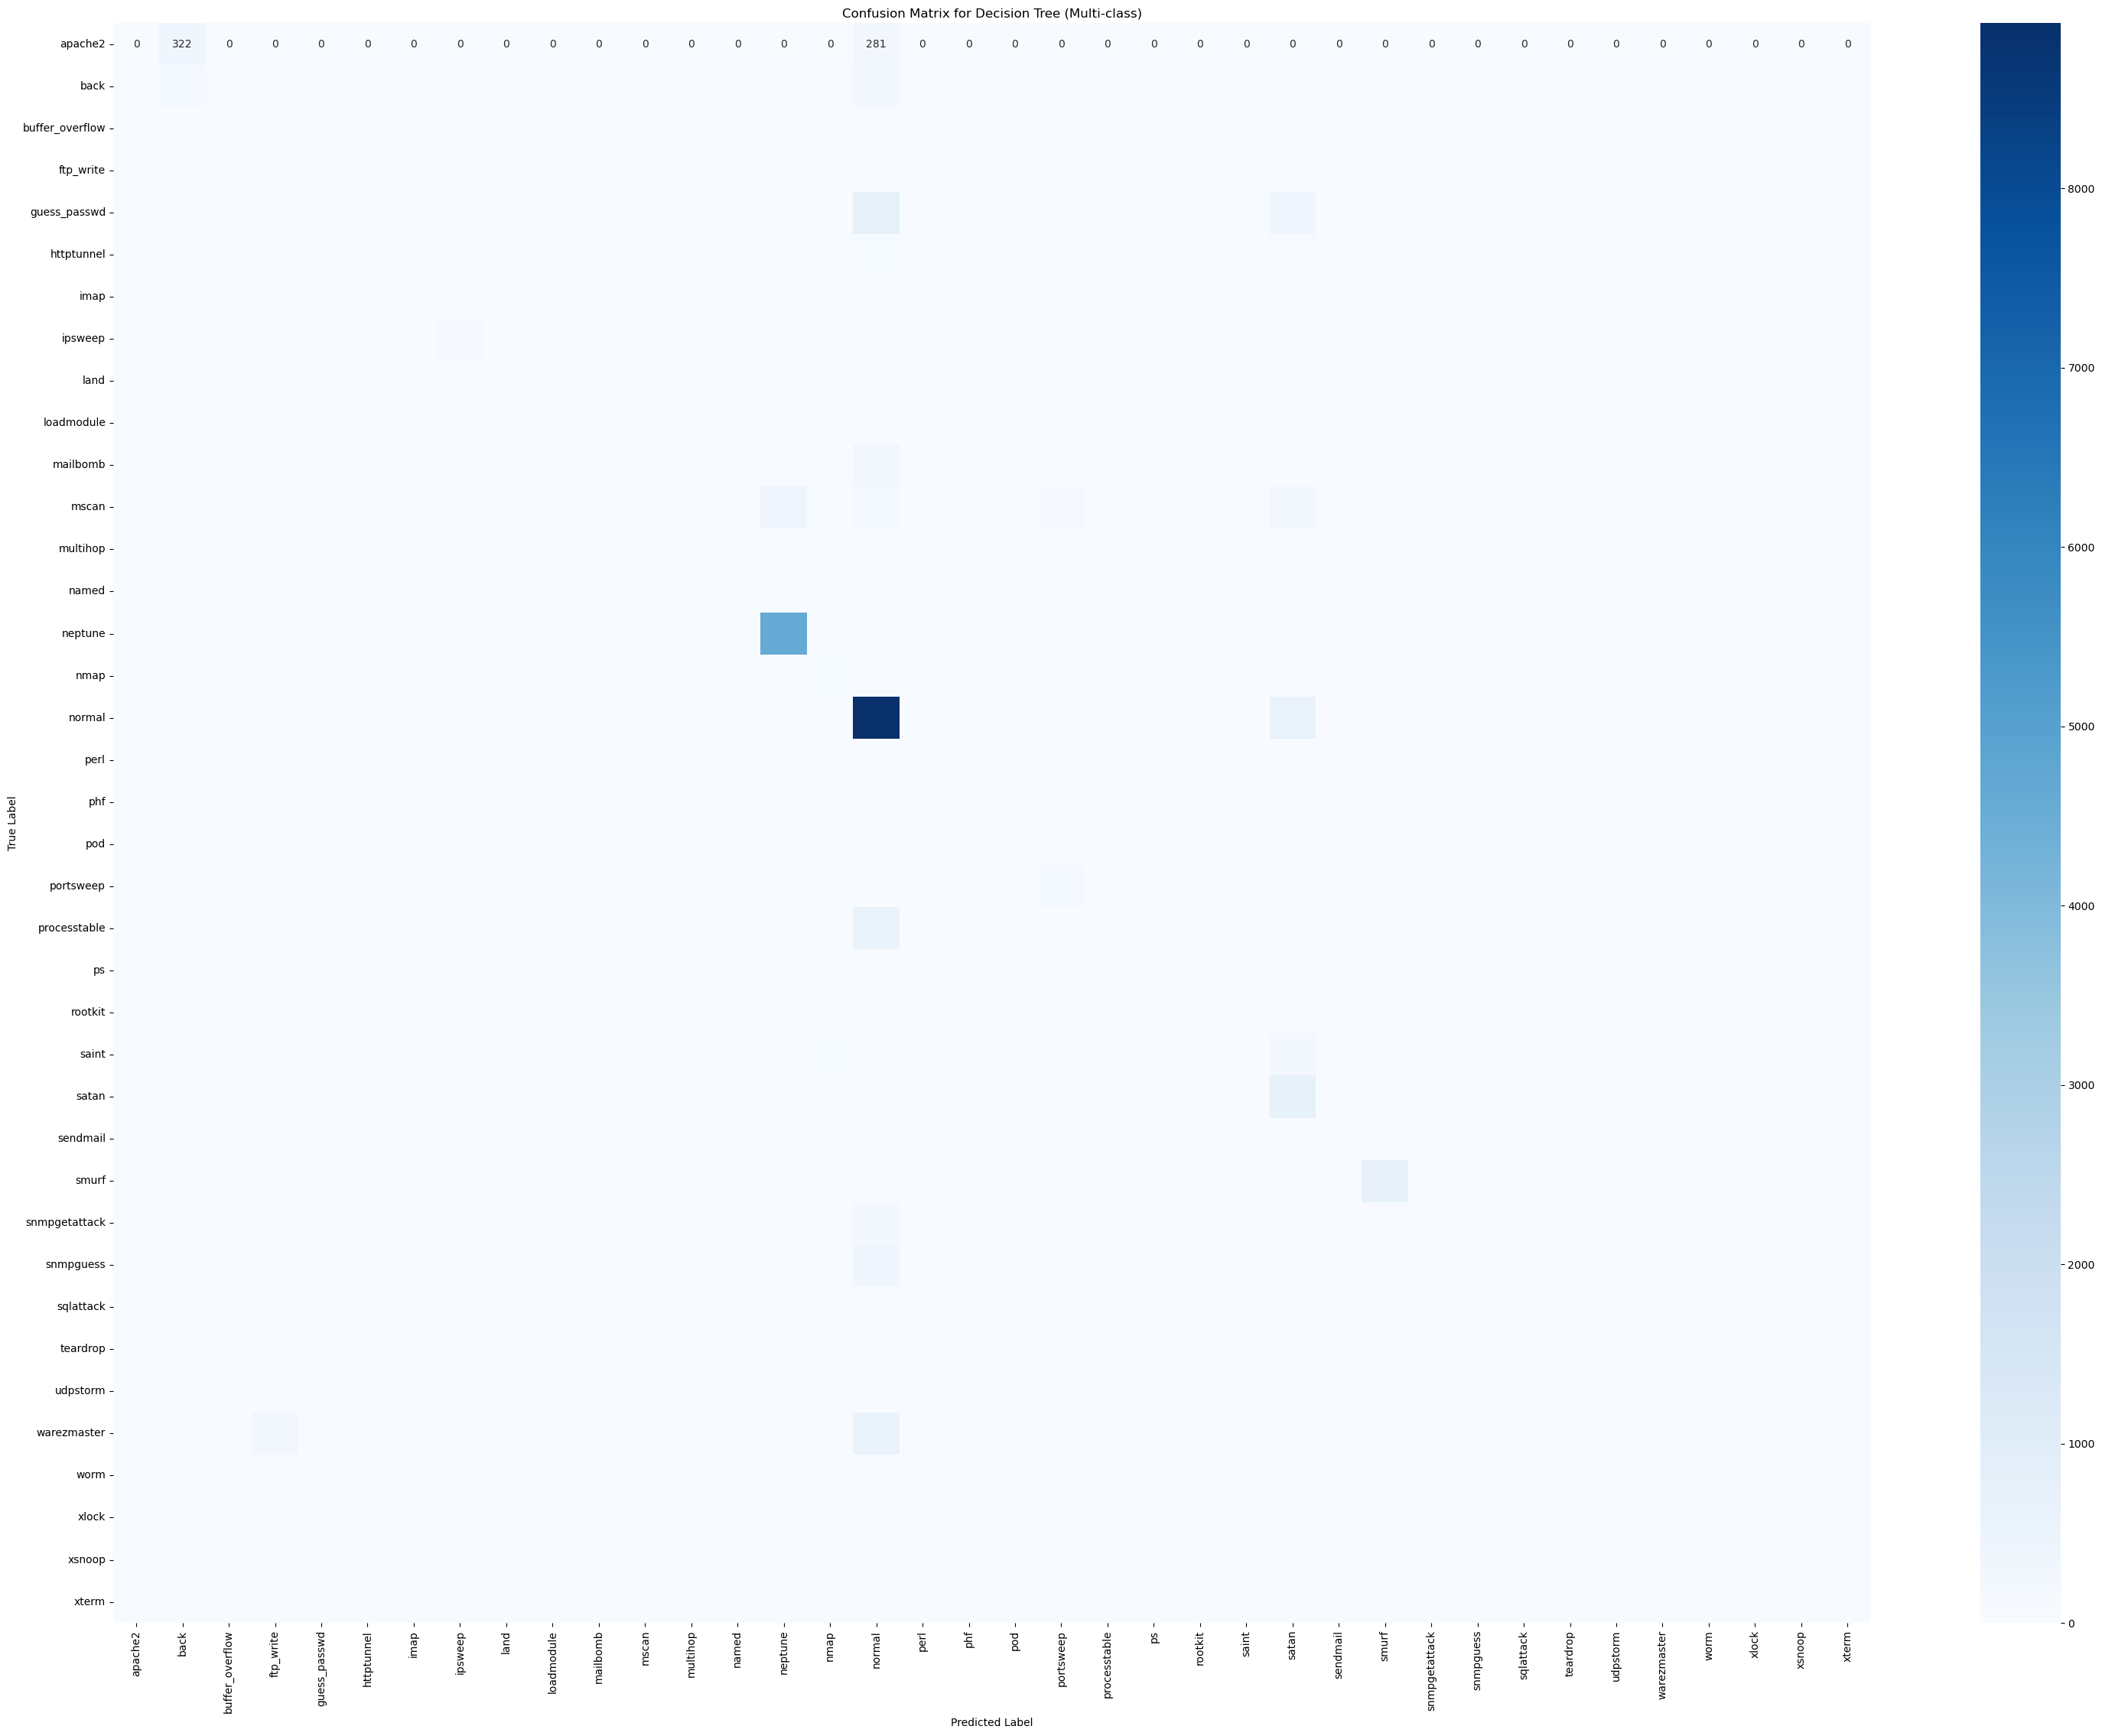


--- Top 10 Most Important Features (from Binary Random Forest) ---
                             importance
flag_SF                          0.0905
same_srv_rate                    0.0755
dst_host_srv_count               0.0695
dst_host_same_srv_rate           0.0653
diff_srv_rate                    0.0588
logged_in                        0.0577
dst_host_srv_serror_rate         0.0538
protocol_type_icmp               0.0425
count                            0.0380
dst_host_same_src_port_rate      0.0363


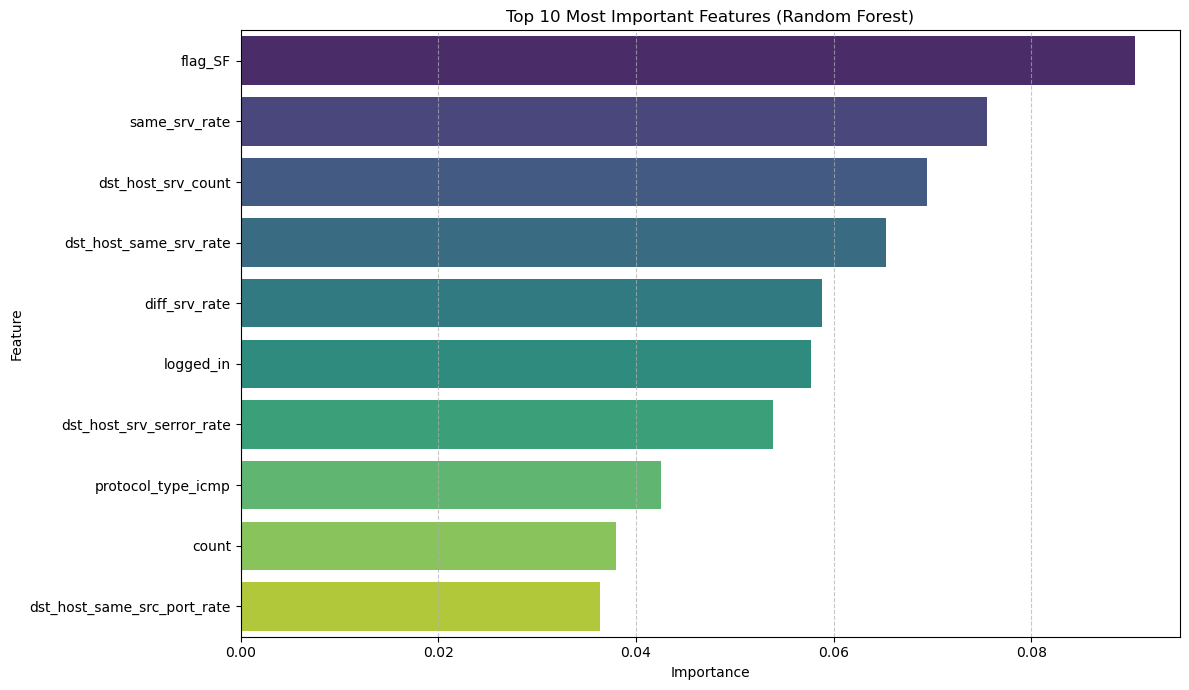


--- Consolidated Binary Classification Results Summary ---
            model_name  accuracy  precision  recall  f1_score
Random Forest (Binary)    0.7729     0.8354  0.7729    0.7699
Decision Tree (Binary)    0.7902     0.8220  0.7902    0.7901

--- Consolidated Multi-Class Classification Results Summary ---
                 model_name  accuracy  precision  recall  f1_score
Random Forest (Multi-class)    0.7196     0.5722  0.7196    0.6182
Decision Tree (Multi-class)    0.6898     0.6448  0.6898    0.6105



In [44]:
# %% [markdown]
# # Project Task 07: Developed Simulation Model - AI-Based IDPS
#
# This Jupyter Notebook contains the refined Python code for developing an AI-based Intrusion Detection and Prevention System (IDPS) using the NSL-KDD dataset. It addresses the requirements for robust data loading, comprehensive preprocessing, and evaluation for both binary and multi-class classification scenarios.
#
# **Dataset:** NSL-KDD-master
# **Programming Environment:** Python in Jupyter Notebook
# **Libraries:** pandas, numpy, scikit-learn, matplotlib, seaborn, tensorflow/keras (optional, for Deep Learning)

# %% [markdown]
# ## 1. Setup and Library Imports
#
# This section imports all necessary Python libraries for data manipulation, machine learning, and visualization.

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Optional: For Deep Learning models (uncomment if you plan to use them)
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adam

# Set random seed for reproducibility
np.random.seed(42)
# if 'tf' in locals(): tf.random.set_seed(42) # Uncomment if using TensorFlow

# Set display options for pandas for better output visibility
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:,.4f}'.format # Format floats for better readability

# %% [markdown]
# ## 2. Data Loading
#
# Load the NSL-KDD dataset using predefined column names. This ensures consistency and avoids dependency on external 'Field Names.csv'.
#
# **Action Required:** Ensure `KDDTrain+.txt` and `KDDTest+.txt` are placed in a subfolder named `dataset` in the same directory as this notebook.

# %%
# Define column names based on NSL-KDD documentation (41 features + class + difficulty_level)
feature_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
    'class', 'difficulty_level' # 'class' is the target, 'difficulty_level' is usually ignored
]

# Load training data
try:
    df_train = pd.read_csv('./KDDTrain+.txt', names=feature_names)
    print("Training data loaded successfully.")
    print(f"Shape of training data: {df_train.shape}")
except FileNotFoundError:
    print("Error: KDDTrain+.txt not found. Please ensure the dataset is in the './dataset/' folder.")
    df_train = pd.DataFrame(columns=feature_names) # Create empty dataframe to prevent further errors

# Load test data
try:
    df_test = pd.read_csv('./KDDTest+.txt', names=feature_names)
    print("Test data loaded successfully.")
    print(f"Shape of test data: {df_test.shape}")
except FileNotFoundError:
    print("Error: KDDTest+.txt not found. Please ensure the dataset is in the './dataset/' folder.")
    df_test = pd.DataFrame(columns=feature_names) # Create empty dataframe to prevent further errors

# Drop the 'difficulty_level' column as it's not used for classification
if 'difficulty_level' in df_train.columns:
    df_train = df_train.drop('difficulty_level', axis=1)
if 'difficulty_level' in df_test.columns:
    df_test = df_test.drop('difficulty_level', axis=1)

print("\n" + "="*50)
print("--- Initial Data Overview (Training Data) ---")
print("="*50)
print(df_train.head())
print("\n" + "-"*50)
print("--- Training Data Info ---")
df_train.info()
print("\n" + "-"*50)
print("--- Test Data Info ---")
df_test.info()
print("="*50 + "\n")

# %% [markdown]
# ## 3. Data Preprocessing
#
# This section preprocesses both training and test datasets. It identifies categorical and numerical features,
# handles target variable encoding (binary and multi-class), and applies `OneHotEncoder` for
# categorical features and `MinMaxScaler` for numerical features using a `ColumnTransformer`.

# %%
# Identify categorical and numerical features for preprocessing
# Exclude the target column 'class' from feature lists
categorical_features = ['protocol_type', 'service', 'flag']
numerical_features = [col for col in df_train.columns if df_train[col].dtype != 'object' and col != 'class']

print(f"\nIdentified Categorical Features: {categorical_features}")
print(f"Identified Numerical Features: {numerical_features}")

# --- Target Variable (Class) Encoding ---
# 1. Binary Classification: 'normal' -> 0, all attacks -> 1
df_train['class_binary'] = df_train['class'].apply(lambda x: 0 if x == 'normal' else 1)
df_test['class_binary'] = df_test['class'].apply(lambda x: 0 if x == 'normal' else 1)

# 2. Multi-Class Classification: Each unique attack type and 'normal' gets a unique integer label
# Combine classes from both train and test to ensure consistent encoding across both datasets
all_classes = pd.concat([df_train['class'], df_test['class']]).unique()
label_encoder_multi = LabelEncoder()
label_encoder_multi.fit(all_classes) # Fit on all unique classes

df_train['class_multi'] = label_encoder_multi.transform(df_train['class'])
df_test['class_multi'] = label_encoder_multi.transform(df_test['class'])

print(f"\nTotal unique classes encoded (multi-class): {len(label_encoder_multi.classes_)}")
print(f"Multi-class label mapping: {dict(zip(label_encoder_multi.classes_, label_encoder_multi.transform(label_encoder_multi.classes_)))}")

# --- Feature Preprocessing Pipeline ---
# Use ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features), # Scale numerical features to [0, 1]
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) # One-hot encode categorical features
    ],
    remainder='passthrough' # Keep other columns (if any, though none expected here)
)

# Separate features (X) and target labels (y)
X_train_orig = df_train.drop(['class', 'class_binary', 'class_multi'], axis=1)
y_train_binary = df_train['class_binary']
y_train_multi = df_train['class_multi']

X_test_orig = df_test.drop(['class', 'class_binary', 'class_multi'], axis=1)
y_test_binary = df_test['class_binary']
y_test_multi = df_test['class_multi']

# Fit the preprocessor on the training data and transform both training and test data
X_train_processed = preprocessor.fit_transform(X_train_orig)
X_test_processed = preprocessor.transform(X_test_orig)

print(f"\nShape of processed training data (features): {X_train_processed.shape}")
print(f"Shape of processed test data (features): {X_test_processed.shape}")
print(f"Shape of training data labels (binary): {y_train_binary.shape}")
print(f"Shape of training data labels (multi-class): {y_train_multi.shape}")
print(f"Shape of test data labels (binary): {y_test_binary.shape}")
print(f"Shape of test data labels (multi-class): {y_test_multi.shape}")


# %% [markdown]
# ## 4. Model Training and Evaluation Function
#
# A generic function to train and evaluate any classification model. This function will also print key metrics and plot the confusion matrix for clear visualization.

# %%
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name="", target_label_map=None):
    """
    Trains a given model and evaluates its performance, including metrics and confusion matrix.

    Args:
        model: The machine learning model instance to train.
        X_train, y_train: Preprocessed training features and labels.
        X_test, y_test: Preprocessed test features and labels.
        model_name (str): A descriptive name for the model (e.g., "Random Forest").
        target_label_map (list/array): List of original string labels for target classes (e.g., ['normal', 'dos', ...]).
                                      Used for confusion matrix tick labels and classification report.
    Returns:
        dict: A dictionary containing evaluation metrics and the trained model instance.
    """
    print(f"\n" + "="*50)
    print(f"--- Training and Evaluating: {model_name} ---")
    print("="*50)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate and print metrics
    accuracy = accuracy_score(y_test, y_pred)
    # Use 'weighted' average for precision, recall, f1-score for imbalanced datasets in multi-class
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f"\n{model_name} Key Performance Indicators (Weighted Averages):")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")

    # Prepare labels and target names for classification report and confusion matrix
    unique_labels_in_test = np.unique(y_test)
    
    if target_label_map is None: # Fallback for binary or if not provided
        current_target_names = ['Normal', 'Attack'] if len(unique_labels_in_test) == 2 else [str(i) for i in unique_labels_in_test]
        current_labels = unique_labels_in_test
    else: # Use provided map, but only for labels present in the test set
        # Map integer labels in unique_labels_in_test to their string names using the full target_label_map
        current_target_names = [target_label_map[i] for i in unique_labels_in_test]
        current_labels = unique_labels_in_test # Ensure labels match the actual unique values in y_test

    print("\nDetailed Classification Report (per class):")
    print(classification_report(y_test, y_pred, labels=current_labels, target_names=current_target_names, zero_division=0))

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=current_labels) # Use current_labels for consistency
    plt.figure(figsize=(max(8, len(current_target_names)*0.8), max(6, len(current_target_names)*0.6)))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=current_target_names, yticklabels=current_target_names)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm,
        'model_instance': model # Return the trained model instance
    }

# %% [markdown]
# ## 5. Implementation and Evaluation of Models
#
# This section demonstrates the training and evaluation of selected algorithms for both binary and multi-class intrusion detection.

# %% [markdown]
# ### 5.1. Binary Classification (Normal vs. Attack)

# %%
print("\n" + "="*70)
print("--- Starting Binary Classification Evaluation (Normal vs. Attack) ---")
print("="*70)
binary_results = {}

# Random Forest Classifier (Binary)
rf_binary_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
binary_results['Random Forest'] = train_and_evaluate_model(
    rf_binary_model, X_train_processed, y_train_binary, X_test_processed, y_test_binary,
    model_name="Random Forest (Binary)", target_label_map=['Normal', 'Attack']
)

# Decision Tree Classifier (Binary)
dt_binary_model = DecisionTreeClassifier(random_state=42)
binary_results['Decision Tree'] = train_and_evaluate_model(
    dt_binary_model, X_train_processed, y_train_binary, X_test_processed, y_test_binary,
    model_name="Decision Tree (Binary)", target_label_map=['Normal', 'Attack']
)

# You can uncomment and add more models here as needed for binary classification
# SVC Classifier (Binary) - May be slow for large datasets, consider linear kernel or sampling
# svc_binary_model = SVC(kernel='rbf', C=1.0, random_state=42, verbose=False)
# binary_results['SVM'] = train_and_evaluate_model(
#     svc_binary_model, X_train_processed, y_train_binary, X_test_processed, y_test_binary,
#     model_name="SVM (Binary)", target_label_map=['Normal', 'Attack']
# )

# K-Nearest Neighbors (KNN) Classifier (Binary)
# knn_binary_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
# binary_results['KNN'] = train_and_evaluate_model(
#     knn_binary_model, X_train_processed, y_train_binary, X_test_processed, y_test_binary,
#     model_name="KNN (Binary)", target_label_map=['Normal', 'Attack']
# )

# Feedforward Neural Network (MLPClassifier) (Binary)
# mlp_binary_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam',
#                                  max_iter=100, random_state=42, verbose=False)
# binary_results['MLP'] = train_and_evaluate_model(
#     mlp_binary_model, X_train_processed, y_train_binary, X_test_processed, y_test_binary,
#     model_name="MLP (Binary)", target_label_map=['Normal', 'Attack']
# )


# %% [markdown]
# ### 5.2. Multi-Class Classification (Normal vs. Specific Attack Types)

# %%
print("\n" + "="*70)
print("--- Starting Multi-Class Classification Evaluation (Normal vs. Attack Types) ---")
print("="*70)
multi_results = {}
multi_class_names = label_encoder_multi.classes_ # Get the actual string names of classes

# Random Forest Classifier (Multi-class)
rf_multi_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
multi_results['Random Forest'] = train_and_evaluate_model(
    rf_multi_model, X_train_processed, y_train_multi, X_test_processed, y_test_multi,
    model_name="Random Forest (Multi-class)", target_label_map=multi_class_names
)

# Decision Tree Classifier (Multi-class)
dt_multi_model = DecisionTreeClassifier(random_state=42)
multi_results['Decision Tree'] = train_and_evaluate_model(
    dt_multi_model, X_train_processed, y_train_multi, X_test_processed, y_test_multi,
    model_name="Decision Tree (Multi-class)", target_label_map=multi_class_names
)

# Example for Deep Learning (if enabled and uncommented at the top)
# num_classes_multi = len(multi_class_names)
# dl_multi_model = Sequential([
#     Dense(128, activation='relu', input_shape=(X_train_processed.shape[1],)),
#     Dropout(0.3),
#     Dense(64, activation='relu'),
#     Dropout(0.3),
#     Dense(num_classes_multi, activation='softmax') # Output layer for multi-class classification
# ])
# dl_multi_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#
# print("\n" + "="*50)
# print("--- Training Deep Learning Model (Multi-class) ---")
# print("="*50)
# history = dl_multi_model.fit(X_train_processed, y_train_multi,
#                              epochs=50, batch_size=32, validation_split=0.2, verbose=0) # verbose=0 to suppress epoch output
#
# y_pred_prob_dl = dl_multi_model.predict(X_test_processed)
# y_pred_dl = np.argmax(y_pred_prob_dl, axis=1)
#
# dl_accuracy = accuracy_score(y_test_multi, y_pred_dl)
# dl_precision = precision_score(y_test_multi, y_pred_dl, average='weighted', zero_division=0)
# dl_recall = recall_score(y_test_multi, y_pred_dl, average='weighted', zero_division=0)
# dl_f1 = f1_score(y_test_multi, y_pred_dl, average='weighted', zero_division=0)
#
# print("\nDeep Learning Model (Multi-class) Key Performance Indicators (Weighted Averages):")
# print(f"  Accuracy: {dl_accuracy:.4f}")
# print(f"  Precision: {dl_precision:.4f}")
# print(f"  Recall: {dl_recall:.4f}")
# print(f"  F1-Score: {dl_f1:.4f}")
# print("\nDetailed Classification Report (per class):")
# print(classification_report(y_test_multi, y_pred_dl, target_names=multi_class_names, zero_division=0))
#
# cm_dl = confusion_matrix(y_test_multi, y_pred_dl)
# plt.figure(figsize=(max(10, len(multi_class_names)*0.5), max(8, len(multi_class_names)*0.4)))
# sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Blues', xticklabels=multi_class_names, yticklabels=multi_class_names)
# plt.title('Confusion Matrix for Deep Learning Model (Multi-class)')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.tight_layout()
# plt.show()
#
# multi_results['Deep Learning'] = {
#     'model_name': 'Deep Learning (Multi-class)',
#     'accuracy': dl_accuracy, 'precision': dl_precision,
#     'recall': dl_recall, 'f1_score': dl_f1,
#     'confusion_matrix': cm_dl,
#     'model_instance': dl_multi_model
# }

# %% [markdown]
# ## 6. Feature Importance (Specific to Random Forest)
#
# This section extracts and displays the top N most important features from the trained Random Forest model.
# Feature importances are readily available for tree-based models and can provide insights into which features contribute most to the model's decisions.

# %%
# Ensure you have processed feature names for accurate labeling
# This requires knowing the order of numerical features and one-hot encoded categorical features
# from the preprocessor.
numerical_features_processed = numerical_features # Numerical features retain their original names
categorical_features_encoded_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
final_feature_names = numerical_features_processed + categorical_features_encoded_names

if 'Random Forest' in binary_results and 'model_instance' in binary_results['Random Forest']:
    rf_model_for_importance = binary_results['Random Forest']['model_instance']
    
    if hasattr(rf_model_for_importance, 'feature_importances_'):
        feature_importances = pd.DataFrame(
            rf_model_for_importance.feature_importances_,
            index=final_feature_names,
            columns=['importance']
        ).sort_values('importance', ascending=False)

        print("\n" + "="*50)
        print("--- Top 10 Most Important Features (from Binary Random Forest) ---")
        print("="*50)
        print(feature_importances.head(10).to_string(float_format='{:,.4f}'.format)) # Format importance values

        # Plot feature importances
        top_10_features = feature_importances.head(10) # Get the top 10 rows (DataFrame)
        plt.figure(figsize=(12, 7))
        sns.barplot(x=top_10_features['importance'], y=top_10_features.index, palette='viridis')
        plt.title('Top 10 Most Important Features (Random Forest)')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print("\nFeature importances attribute not found for the Random Forest model (binary classification).")
else:
    print("\nRandom Forest (Binary) model not found in results or model instance not stored. Cannot display feature importance.")


# %% [markdown]
# ## 7. Consolidated Results Summary
#
# A consolidated view of the key performance indicators from all evaluated models for easier comparison. This summary table will be crucial for the "Results and Discussion" section of your research paper.

# %%
print("\n" + "="*60)
print("--- Consolidated Binary Classification Results Summary ---")
print("="*60)
binary_summary_df = pd.DataFrame([
    {k: v for k, v in res.items() if k not in ['confusion_matrix', 'model_instance']}
    for res in binary_results.values()
])
# Reorder columns for better presentation
binary_summary_df = binary_summary_df[['model_name', 'accuracy', 'precision', 'recall', 'f1_score']]
print(binary_summary_df.to_string(index=False))

print("\n" + "="*60)
print("--- Consolidated Multi-Class Classification Results Summary ---")
print("="*60)
multi_summary_df = pd.DataFrame([
    {k: v for k, v in res.items() if k not in ['confusion_matrix', 'model_instance']}
    for res in multi_results.values()
])
# Reorder columns for better presentation
multi_summary_df = multi_summary_df[['model_name', 'accuracy', 'precision', 'recall', 'f1_score']]
print(multi_summary_df.to_string(index=False))
print("="*60 + "\n")

# %% [markdown]
# ## 8. Proof of Simulation Work (As per Task 07)
#
# The successful execution of the above cells, along with the detailed outputs, serves as concrete proof that the simulation model has been developed and works as intended for analyzing the NSL-KDD dataset. These outputs include:
#
# * **Data Loading Confirmation:** Messages indicating successful loading of `KDDTrain+.txt` and `KDDTest+.txt` with their respective shapes.
# * **Data Preprocessing Details:** Information on identified features, class encoding (binary and multi-class), and the resulting shapes of processed data.
# * **Model Training and Evaluation Output:** For each trained model (Random Forest, Decision Tree, etc.), you will see:
#     * **Key Performance Indicators (KPIs):** Accuracy, Precision, Recall, and F1-Score (weighted averages).
#     * **Detailed Classification Report:** Metrics broken down per class, providing insights into performance on individual attack types and normal traffic.
#     * **Visual Confusion Matrix:** A heatmap displaying True Positives, True Negatives, False Positives, and False Negatives, allowing for a clear understanding of classification errors.
# * **Feature Importance Analysis:** A list and plot of the top 10 most important features identified by the Random Forest model, indicating which network attributes are most influential in detecting intrusions.
# * **Consolidated Results Summary:** Tables summarizing the key metrics for all models in both binary and multi-class scenarios, facilitating easy comparison.
#
# These comprehensive outputs are the primary results to be analyzed and discussed in **Project Task 08: Investigation and Development** and formally presented in **Project Task 09: Results and Discussion**.